Path to dataset files: C:\Users\sarus\.cache\kagglehub\datasets\yusufdelikkaya\imdb-movie-dataset\versions\1
Dataset Overview:
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                               

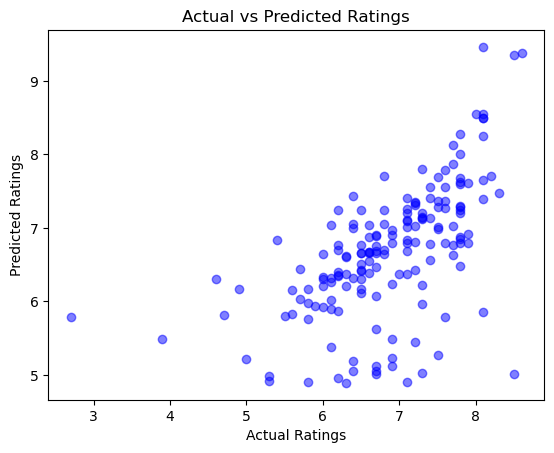


Random Forest Classifier - Accuracy: 0.71

Feature Importance:
Votes                            0.418922
Year                             0.103079
Genre_Action,Adventure,Sci-Fi    0.020095
Genre_Drama                      0.016864
Genre_Drama,Romance              0.012597
                                   ...   
Genre_Drama,History              0.000000
Genre_Drama,Fantasy,Thriller     0.000000
Genre_Crime,Drama,Fantasy        0.000000
Genre_Crime,Mystery,Thriller     0.000000
Genre_Thriller                   0.000000
Length: 190, dtype: float64


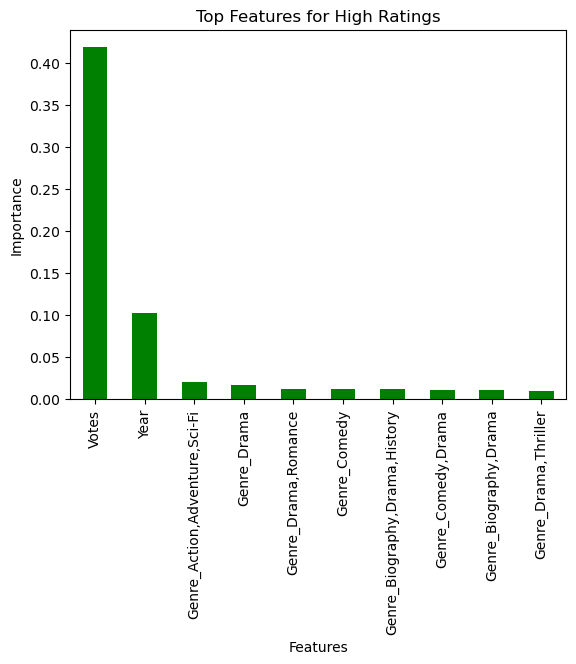

In [1]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("yusufdelikkaya/imdb-movie-dataset")

print("Path to dataset files:",path)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/sarus/.cache/kagglehub/datasets/yusufdelikkaya/imdb-movie-dataset/versions/1/imdb_movie_dataset.csv" 
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Overview:")
print(df.head())

# Data Cleaning: Drop rows with missing values and reset index
df = df.dropna().reset_index(drop=True)

# Encoding categorical data (e.g., Genre)
df = pd.get_dummies(df, columns=["Genre"], drop_first=True)

# Feature Selection
features = ["Votes", "Year"] + [col for col in df.columns if col.startswith("Genre_")]
target = "Rating"

# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression for Rating Prediction
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nLinear Regression - Mean Squared Error: {mse:.2f}")

# Visualizing Predictions
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.title("Actual vs Predicted Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

# Classification: Categorizing Movies Based on Rating
# Create a new column for classification (e.g., High Rating: 1, Low Rating: 0)
df["High_Rating"] = (df["Rating"] >= 7.0).astype(int)
X = df[features]
y = df["High_Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Classifier - Accuracy: {accuracy:.2f}")

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot Feature Importance
feature_importance.head(10).plot(kind="bar", color="green", title="Top Features for High Ratings")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

Path to dataset files: C:\Users\sarus\.cache\kagglehub\datasets\yusufdelikkaya\imdb-movie-dataset\versions\1
Dataset Overview:
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                               

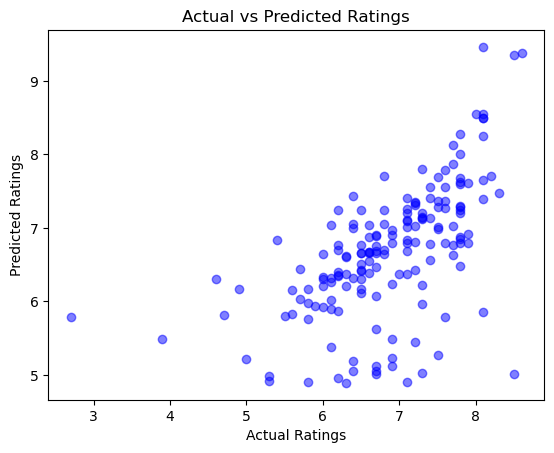


Random Forest Classifier - Accuracy: 0.71

Feature Importance:
Votes                            0.418922
Year                             0.103079
Genre_Action,Adventure,Sci-Fi    0.020095
Genre_Drama                      0.016864
Genre_Drama,Romance              0.012597
                                   ...   
Genre_Drama,History              0.000000
Genre_Drama,Fantasy,Thriller     0.000000
Genre_Crime,Drama,Fantasy        0.000000
Genre_Crime,Mystery,Thriller     0.000000
Genre_Thriller                   0.000000
Length: 190, dtype: float64


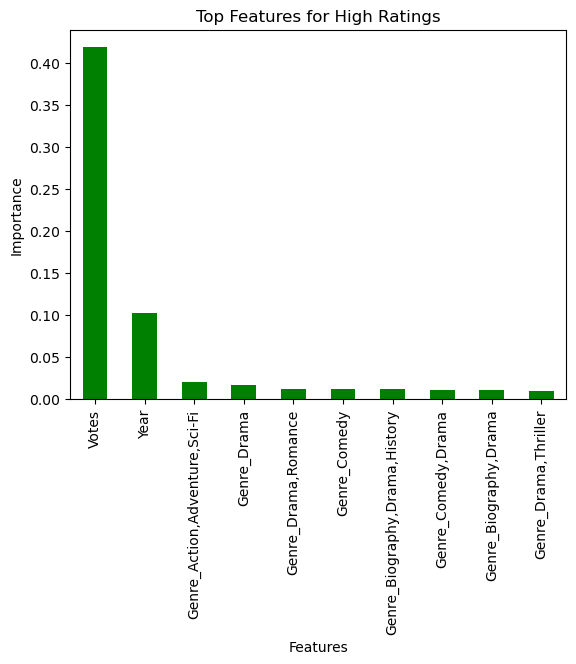

In [7]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("yusufdelikkaya/imdb-movie-dataset")

print("Path to dataset files:",path)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/sarus/.cache/kagglehub/datasets/yusufdelikkaya/imdb-movie-dataset/versions/1/imdb_movie_dataset.csv" 
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Overview:")
print(df.head())

# Data Cleaning: Drop rows with missing values and reset index
df = df.dropna().reset_index(drop=True)

# Encoding categorical data (e.g., Genre)
df = pd.get_dummies(df, columns=["Genre"], drop_first=True)

# Feature Selection
features = ["Votes", "Year"] + [col for col in df.columns if col.startswith("Genre_")]
target = "Rating"

# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression for Rating Prediction
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nLinear Regression - Mean Squared Error: {mse:.2f}")

# Visualizing Predictions
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.title("Actual vs Predicted Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

# Classification: Categorizing Movies Based on Rating
# Create a new column for classification (e.g., High Rating: 1, Low Rating: 0)
df["High_Rating"] = (df["Rating"] >= 7.0).astype(int)
X = df[features]
y = df["High_Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Classifier - Accuracy: {accuracy:.2f}")

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot Feature Importance
feature_importance.head(10).plot(kind="bar", color="green", title="Top Features for High Ratings")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()